# 0. 들어가기

데이터 분석은 크게 **세 단계**로 진행됩니다.

1. **데이터 탐색**  
   데이터를 불러오고, 구조와 크기를 확인합니다.  

2. **기초 통계로 요약**  
   평균, 중앙값, 최댓값, 최솟값 같은 수치로 데이터를 간단히 요약합니다.  

3. **시각화**  
   히스토그램, 박스플롯 같은 그래프를 통해 데이터를 직관적으로 이해합니다.  

이러한 과정 전체를 **EDA(Exploratory Data Analysis, 탐색적 데이터 분석)** 라고 합니다.  
EDA는 데이터를 처음 접했을 때 숨겨진 패턴을 찾고, 이상치를 확인하며, 가설을 세우는 데 중요한 단계입니다.

이번 수업에서는 `Pandas`로 데이터를 다루고, `Matplotlib`와 `Seaborn`으로 시각화하는 방법을 배웁니다.

# 1. 데이터 준비 & Pandas 기초

## 1.1 Pandas란?
- 파이썬에서 데이터를 표(table) 형태로 다루는 라이브러리
- **엑셀과 비슷한 DataFrame**을 제공
- 데이터 탐색, 전처리, 분석의 표준 도구

```python
import pandas as pd
```

## 1.2 데이터 불러오기

### `pd.read_csv("파일경로")`
- CSV 파일(콤마로 구분된 텍스트 파일)을 불러와서 **DataFrame**으로 변환  
- **DataFrame**: 행(row)과 열(column)로 이루어진 2차원 데이터 구조

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)

In [3]:
import pandas as pd

# Titanic 데이터 불러오기 (예시)
titanic = pd.read_csv("./content/titanic.csv")

# Bike Sharing 데이터 불러오기 (예시)
bike = pd.read_csv("./content/bike_sharing.csv")

FileNotFoundError: [Errno 2] No such file or directory: './content/titanic.csv'

## 1.3 데이터 구조 확인

### `df.shape`
- DataFrame의 (행 개수, 열 개수)를 튜플 형태로 반환

### `df.columns`
- DataFrame의 열 이름 확인


In [5]:
print(titanic.shape)     # (891, 12) → 891명, 12개 속성
print(titanic.columns)   # 컬럼명 리스트

(891, 11)
Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


## 1.4 데이터 미리보기

### `df.head()`
- DataFrame의 앞부분 5행을 보여줌  
- 데이터가 어떻게 생겼는지 빠르게 확인할 때 사용

### `df.tail()`
- DataFrame의 뒷부분 5행을 보여줌  

In [6]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 1.5 데이터 요약 정보

### `df.info()`
- 각 열의 자료형과 결측치(null) 여부를 보여줌

### `df.describe()`
- 기본적인 통계값(평균, 표준편차, 최소/최대, 사분위수)을 수치형 데이터에 대해 요약

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.6 데이터 정렬

### `df.sort_values("컬럼명")`
- 특정 열 기준으로 정렬  
- 오름차순 / 내림차순 지정 가능 (`ascending=True/False`)

In [10]:
# 나이를 기준으로 오름차순 정렬
titanic.sort_values("age").head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [11]:
# 요금을 기준으로 내림차순 정렬
titanic.sort_values("fare", ascending=False).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


## 1.7 인덱싱 & 선택

- `loc[]`: 행/열 이름(label) 기반 접근  
- `iloc[]`: 행/열 번호(index) 기반 접근

In [12]:
# 특정 행 선택
titanic.loc[titanic['PassengerId']==1]# 첫 번째 승객 정보 (이름 기반)

KeyError: 'PassengerId'

In [13]:
# 특정 행 선택
titanic.loc[titanic['age']==22, ['age','survived']] # 나이가 22인 사람의 Age 컬럼만 보기

,age,survived
0,22.0,0
60,22.0,0
80,22.0,0
112,22.0,0
141,22.0,1
151,22.0,1
212,22.0,0
225,22.0,0
243,22.0,0
287,22.0,0


In [14]:
titanic.iloc[0] # 첫 번째 승객 정보 (숫자 기반)

survived                          0
pclass                            3
name        Braund, Mr. Owen Harris
sex                            male
age                            22.0
sibsp                             1
parch                             0
ticket                    A/5 21171
fare                           7.25
cabin                           NaN
embarked                          S
Name: 0, dtype: object

In [15]:
# 특정 열 선택
print(titanic["age"].head())   # 나이 컬럼만

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


## 1.8 데이터 수정/추가

- 새로운 열을 추가하거나 값 수정 가능

In [16]:
# 나이를 10살 단위 구간으로 나누는 새로운 열 추가
titanic["AgeGroup"] = (titanic["age"] // 10) * 10
titanic[["age", "AgeGroup"]].head()

,age,AgeGroup
0,22.0,20.0
1,38.0,30.0
2,26.0,20.0
3,35.0,30.0
4,35.0,30.0


### ✅ 체크포인트
- `pd.read_csv()` 로 CSV 파일을 불러와 DataFrame을 만든다.  
- `shape`, `columns`, `head()`, `tail()` 로 데이터 구조를 빠르게 파악한다.  
- `info()`, `describe()` 로 데이터 타입과 통계 요약을 확인할 수 있다.  
- `sort_values()` 로 정렬, `loc[]`와 `iloc[]`로 인덱싱한다.  
- 새로운 열을 추가하거나 값 수정이 가능하다.


# 2. 기술 통계 기초

## 2.1 데이터의 종류
- **수치형 데이터 (Numerical)**  
  → 숫자로 된 데이터 (예: 나이, 요금, 대여량)  

- **범주형 데이터 (Categorical)**  
  → 그룹/범주를 나타내는 데이터 (예: 성별, 클래스, 요일)

## 2.2 대표값 (중심 경향)
데이터를 대표하는 값들

- **평균 (mean)**: 모든 값을 더한 뒤 개수로 나눔  
- **중앙값 (median)**: 데이터를 크기순으로 정렬했을 때 한가운데 값  
- **최빈값 (mode)**: 가장 많이 등장하는 값

In [17]:
print(titanic["age"].median())    # 중앙값 나이
print(titanic["age"].mean())      # 평균 나이
print(titanic["age"].mode())      # 최빈값 나이

# 👉 승객 나이(`Age`) 평균과 중앙값은 다를 수 있다.

28.0
29.69911764705882
0    24.0
Name: age, dtype: float64


## 2.3 범위와 분포
데이터의 퍼짐 정도를 나타내는 값들

- **최소값 (min)**, **최대값 (max)**  
- **사분위수 (quantile)**  
  - 데이터를 4등분한 구간의 경계  
  - 25%, 50%(=중앙값), 75% 지점  
- **분산 (variance)**: 데이터가 평균에서 얼마나 떨어져 있는지  
- **표준편차 (std)**: 분산의 제곱근 → 데이터의 흩어진 정도  

In [18]:
print(titanic["age"].min())      # 최소 나이
print(titanic["age"].max())      # 최대 나이
print(titanic["age"].quantile([0.25, 0.5, 0.75]))  # 사분위수
print(titanic["age"].std())      # 표준편차

0.42
80.0
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64
14.526497332334042


## 2.4 Pandas describe()
- `df.describe()` 로 한 번에 기초 통계 요약 제공
- 기본적으로 수치형 데이터만 보여줌
- 옵션 `include="all"` → 범주형 데이터까지 요약  

In [19]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,AgeGroup
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,25.252101
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,14.970969
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,20.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


### ✅ 체크포인트
- **평균, 중앙값, 최빈값**은 데이터의 중심을 요약하는 대표값이다.  
- **최솟값, 최댓값, 사분위수, 표준편차**는 데이터의 퍼짐 정도를 설명한다.  
- Pandas의 `describe()`는 여러 통계값을 한 번에 확인할 수 있다.  


# 3. 데이터 시각화 기본 (Matplotlib & Seaborn)



## 3.1 Matplotlib & Seaborn 소개
- **Matplotlib**: 파이썬의 가장 기본적인 시각화 라이브러리  
- **Seaborn**: Matplotlib 기반으로, 통계 시각화에 특화된 라이브러리

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3.2 히스토그램 (Histogram)
- 데이터를 구간(bin)으로 나누어, 각 구간에 속한 데이터 개수를 세어 표시  
- 데이터의 분포 모양을 직관적으로 확인 가능

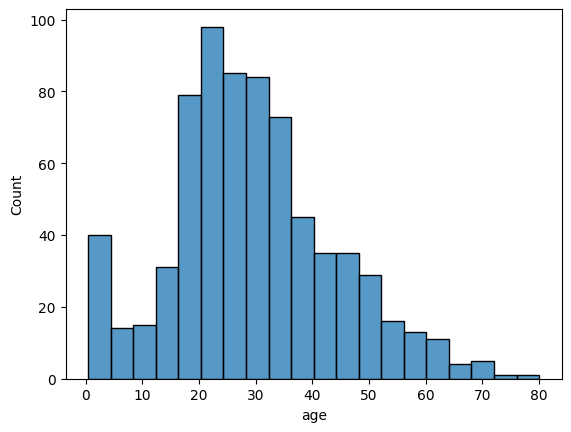

In [21]:
# Titanic 예시: 승객들의 나이 분포 확인
sns.histplot(titanic["age"].dropna(), bins=20, kde=False)
plt.show()

## 3.3 박스플롯 (Boxplot)
- 데이터의 **사분위수(25%, 50%, 75%)** 와 **이상치(outlier)** 를 한눈에 보여줌  
- 중앙값과 데이터 퍼짐 정도를 시각적으로 확인 가능  


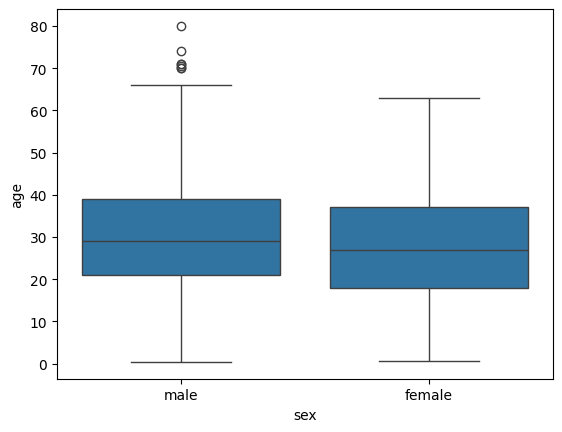

In [22]:
# Titanic 예시: 남성과 여성의 나이 분포 비교
sns.boxplot(x="sex", y="age", data=titanic)
plt.show()



## 3.4 KDE Plot (확률 밀도 함수)
- 히스토그램을 부드럽게 표현한 곡선 그래프  
- 데이터가 어느 구간에 몰려 있는지 직관적으로 파악 가능  


C:\Users\amy\AppData\Local\Temp\ipykernel_40640\631852793.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic["age"].dropna(), shade=True)


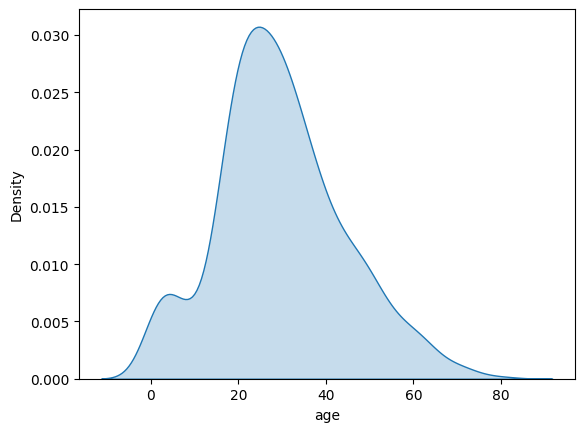

In [23]:
# Titanic 예시: 승객 나이의 전체 분포 곡선
sns.kdeplot(titanic["age"].dropna(), shade=True)
plt.show()



## 3.5 여러 분포 비교
- 그룹별로 색을 다르게 해서 히스토그램이나 KDE plot 그리기  


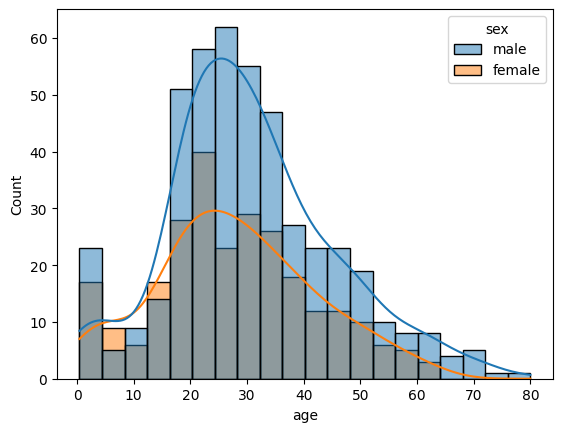

In [24]:
# Titanic 예시: 성별에 따른 나이 분포 비교
sns.histplot(data=titanic, x="age", hue="sex", bins=20, kde=True)
plt.show()

### ✅ 체크포인트
- **히스토그램**: 데이터의 빈도 분포 확인  
- **박스플롯**: 사분위수와 이상치 확인  
- **KDE plot**: 데이터 분포를 곡선으로 표현  
- 그룹별 분포 비교 가능 (예: 성별, 등급, 계절 등)  


# 4. 다양한 데이터 분포 살펴보기

## 4.1 정규분포 (Normal Distribution)
- 데이터가 **종 모양(bell curve)**으로 퍼져 있는 분포  
- 평균을 중심으로 대칭  
- 많은 자연현상과 사회현상에서 나타나는 가장 중요한 분포  

예: 사람의 키, 시험 점수

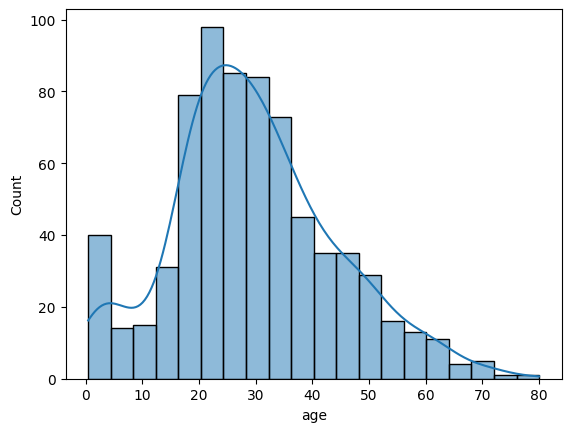

In [25]:
# Titanic 예시: 승객 나이는 대체로 정규분포에 가까운 모양을 보임
sns.histplot(titanic["age"].dropna(), kde=True)
plt.show()

## 4.2 비대칭 분포 (Skewness)
- 분포가 한쪽으로 치우쳐 있는 경우  
- **왼쪽 꼬리(음의 왜도)**: 평균 < 중앙값  
- **오른쪽 꼬리(양의 왜도)**: 평균 > 중앙값  

예: 소득 분포 (고소득자가 소수 존재 → 오른쪽 꼬리)

In [26]:
# Bike Sharing 예시: 특정 날씨나 계절 때문에 수요가 치우칠 수 있음
sns.histplot(bike["count"], kde=True)
plt.show()

NameError: name 'bike' is not defined

### ✅ 체크포인트
- **정규분포**: 평균 중심, 대칭적인 종 모양 분포  
- **왜도(Skewness)**: 분포가 한쪽으로 치우쳐 있는 정도

# 5. Pandas와 시각화 연계

## 5.1 DataFrame 자체로 그래프 그리기
- Pandas는 Matplotlib을 기반으로 간단한 시각화를 지원
- `df.plot()` 메서드 사용

In [27]:
# Bike Sharing 데이터의 월별 평균 대여량
bike['month'] = pd.to_datetime(bike['datetime']).dt.month
bike.groupby("month")["count"].mean().plot(kind="bar")
plt.show()

NameError: name 'bike' is not defined

## 5.2 시리즈(Series) 그래프
- 특정 열(Series)에 대해서 바로 시각화 가능

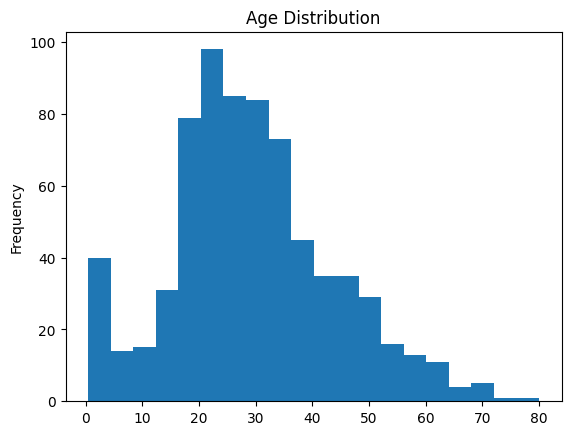

In [28]:
titanic["age"].plot(kind="hist", bins=20, title="Age Distribution")
plt.show()

## 5.3 그룹별 집계와 시각화
- `groupby()`로 데이터를 그룹화하고 요약 통계 계산
- 그 결과를 시각화와 연결

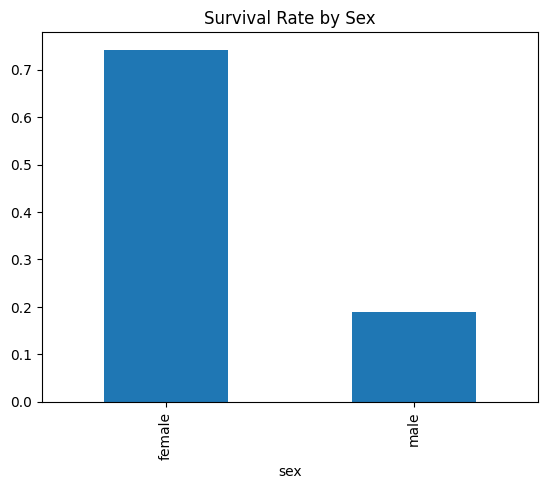

In [29]:
# 성별에 따른 평균 생존율
survival_rate = titanic.groupby("sex")["survived"].mean()
survival_rate.plot(kind="bar", title="Survival Rate by Sex")
plt.show() # titanic 예시: 여성의 생존율이 남성보다 훨씬 높음

## 5.4 Seaborn과 함께 사용하기
- Pandas DataFrame은 Seaborn의 입력 데이터로 바로 활용 가능
- Seaborn은 더 세련되고 다양한 시각화 제공

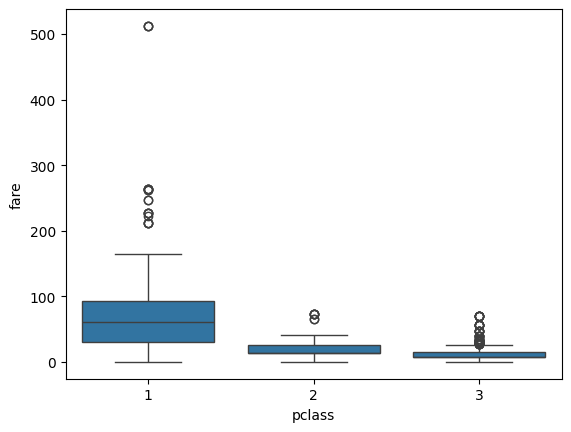

In [30]:
# 클래스별 요금 분포
sns.boxplot(x="pclass", y="fare", data=titanic)
plt.show()

### ✅ 체크포인트
- Pandas의 `plot()`으로 DataFrame과 Series를 빠르게 시각화할 수 있다.  
- `groupby()`를 활용하면 그룹별 통계를 계산하고 바로 그래프와 연결할 수 있다.  
- Seaborn은 Pandas DataFrame을 직접 받아 고급 시각화를 지원한다.  


# 6. 정리 & 실습 문제

## 6.1 오늘 배운 내용 정리
- **기술 통계**
  - 평균, 중앙값, 최빈값으로 데이터의 중심을 요약
  - 최소값, 최대값, 사분위수, 표준편차로 데이터의 범위와 퍼짐 확인
- **데이터 시각화**
  - 히스토그램: 데이터 분포 확인
  - 박스플롯: 사분위수와 이상치 시각화
  - KDE plot: 분포를 곡선으로 부드럽게 표현
- **데이터 분포의 형태**
  - 정규분포, 왜도, 이봉분포
- **Pandas와 시각화**
  - DataFrame의 `plot()`으로 빠른 시각화
  - `groupby()`와 시각화를 연결하여 그룹별 비교 가능
  - Seaborn으로 세련된 시각화 지원

## 6.2 실습 문제

### 문제 1
Titanic 데이터에서 **성별별 나이 분포**를 박스플롯으로 그려보세요.  
- `sns.boxplot()` 활용  
- 남성과 여성의 나이 분포 차이를 관찰해보세요.
<details>
<summary>정답</summary>

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 제거 후 시각화 (Age가 NaN인 행 제외)
sns.boxplot(x="Sex", y="Age", data=titanic.dropna(subset=["Age"]))
plt.title("Age Distribution by Sex (Titanic)")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()
```

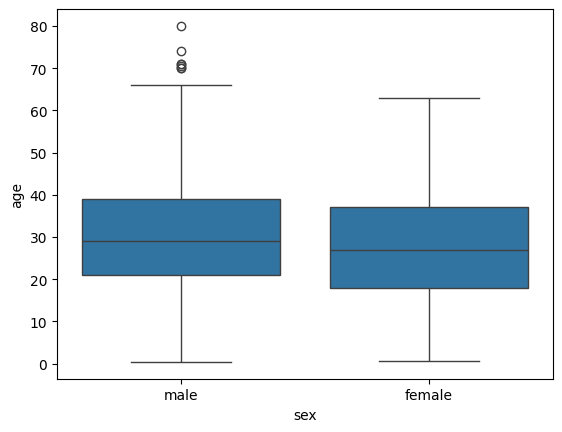

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=titanic.dropna(subset=['age']), x='sex', y='age')
plt.show()

### 문제 2
Bike Sharing 데이터에서 **월별 평균 대여량**을 막대그래프로 시각화하세요.  
- `groupby("month")["count"].mean()` 활용  
- 계절에 따른 수요 차이를 설명해보세요.


<details>
<summary>정답</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt

# month 컬럼이 없을 수 있으므로 보강
if "month" not in bike.columns:
    # datetime에서 월 추출
    bike["month"] = pd.to_datetime(bike["datetime"]).dt.month

monthly_mean = bike.groupby("month")["count"].mean()

monthly_mean.plot(kind="bar")
plt.title("Average Bike Demand by Month")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.show()
```

In [32]:
# 여기에 작성하세요
import matplotlib.pyplot as plt
import seaborn as sns


### 문제 3
Titanic 데이터의 `Age` 컬럼에 대해 **평균, 중앙값, 최빈값**을 구하고 비교하세요.  
- `mean()`, `median()`, `mode()` 활용  
- 왜 이 값들이 서로 다른지 설명해보세요. (이상치나 분포의 왜도 때문일 수 있음)

<details>
<summary>정답</summary>

```python
import numpy as np

age = titanic["Age"].dropna()

mean_age = age.mean()
median_age = age.median()
mode_age = age.mode()  # Series 반환(복수 최빈값 가능)

print("평균:", mean_age)
print("중앙값:", median_age)
print("최빈값:", list(mode_age.values))

# 해석 포인트(예시)
# - 평균과 중앙값 차이가 크면 분포가 치우쳤거나(outlier 영향) 결측치 처리 이슈가 있을 수 있음
```

In [33]:
# 여기에 작성하세요
import matplotlib.pyplot as plt
import seaborn as sns

age = titanic['age'].dropna()
print(f'평균: {age.mean()}')
print(f'중앙값: {age.median()}')
print(f'최빈값: {age.mode()}')

평균: 29.69911764705882
중앙값: 28.0
최빈값: 0    24.0
Name: age, dtype: float64


### 문제 4
Bike Sharing 데이터에서 `count` 분포를 히스토그램과 KDE plot으로 시각화하세요.  
- 두 그래프를 비교해보고, KDE가 어떤 장점을 가지는지 설명해보세요.

<details>
<summary>정답</summary>

```python
import matplotlib.pyplot as plt

# 히스토그램
sns.histplot(bike["count"], bins=30, kde=False)
plt.title("Histogram of Bike Demand (count)")
plt.xlabel("count")
plt.ylabel("frequency")
plt.show()

# KDE plot
sns.kdeplot(bike["count"], fill=True)
plt.title("KDE of Bike Demand (count)")
plt.xlabel("count")
plt.ylabel("density")
plt.show()

# 비교 포인트(예시)
# - 히스토그램: 구간별 빈도 확인에 유리 (bin 크기에 따라 모양 영향)
# - KDE: 분포의 전반적 형태를 부드럽게 파악 (피크/꼬리 관찰에 유리)
```

In [34]:
# 여기에 작성하세요
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 5 (심화)
Titanic 데이터에서 **Pclass(객실 등급)** 에 따른 **생존율**을 계산하고, 막대그래프로 표현하세요.  
- `groupby("Pclass")["Survived"].mean()` 활용  
- 어떤 등급일수록 생존율이 높았는지 해석해보세요.

<details>
<summary>정답</summary>

```python

import matplotlib.pyplot as plt

survival_by_pclass = titanic.groupby("Pclass")["Survived"].mean()

survival_by_pclass.plot(kind="bar")
plt.title("Survival Rate by Passenger Class (Titanic)")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

# 해석 포인트(예시)
# - 일반적으로 1등석의 생존율이 높게 나타나는 경향
# - 계층/구역/구조적 요인이 결과에 반영될 수 있음
```

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


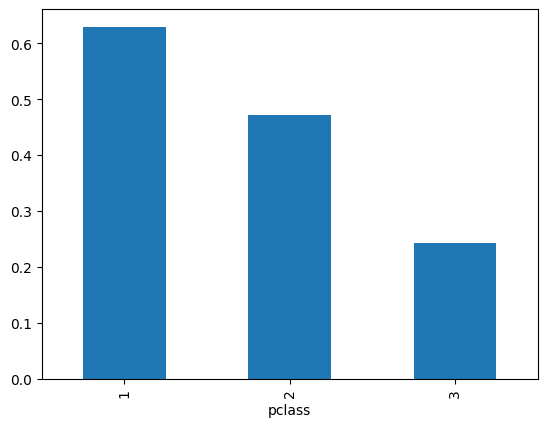

In [35]:
# 여기에 작성하세요
import matplotlib.pyplot as plt

survived_by_pclass = titanic.groupby('pclass')['survived'].mean()
print(survived_by_pclass)
survived_by_pclass.plot(kind='bar')
plt.show()

### ✅ 체크포인트
- 기술 통계와 시각화를 함께 쓰면 데이터 이해도가 크게 높아진다.  
- Pandas와 Seaborn을 활용하면 데이터 탐색부터 시각화까지 간단하게 연결할 수 있다.  
- 단순히 수치를 계산하는 것보다 **그래프로 확인**하면 분포와 패턴을 직관적으로 파악할 수 있다.

### 다른 사람들의 EDA 참고하기!

타이타닉과 자전거 수요 예측 데이터에 대해 직접 분석해보고, 전세계의 다른 데이터 과학자들은 어떻게 EDA를 했는지 참고해보세요.

1. Kaggle 코드 게시판
https://www.kaggle.com/competitions/titanic/code?competitionId=3136&searchQuery=EDA&excludeNonAccessedDatasources=true

2. 구글 검색
https://www.google.com/search?q=titanic+eda&oq=titanic+e&gs_lcrp=EgZjaHJvbWUqBwgCEAAYgAQyBggAEEUYOTIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIGCAUQRRg8MgYIBhBFGDwyBggHEEUYPNIBCDg0NThqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8
